In [1]:
import pandas as pd
import numpy as np
import re
import nltk

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')

## Exploratory data analysis

In [3]:
print("Training samples: {}".format(train.shape[0]))
print("Test samples: {}".format(test.shape[0]))
train.head(5)

Training samples: 7613
Test samples: 3263


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


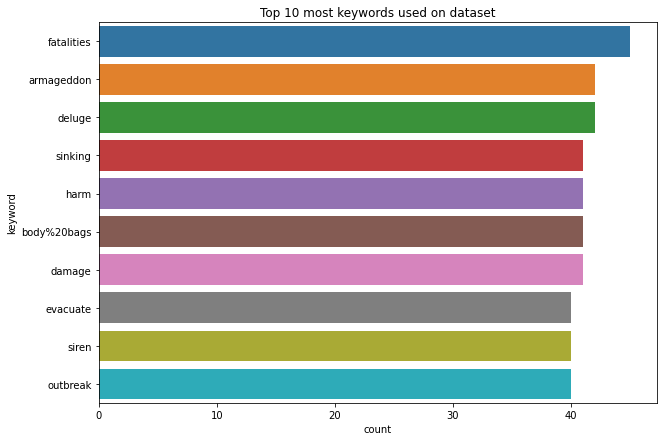

In [5]:
plt.figure(figsize= (10,7))
sns.countplot(y= train['keyword'], order=train['keyword'].value_counts().iloc[:10].index)
plt.title('Top 10 most keywords used on dataset')
plt.show()

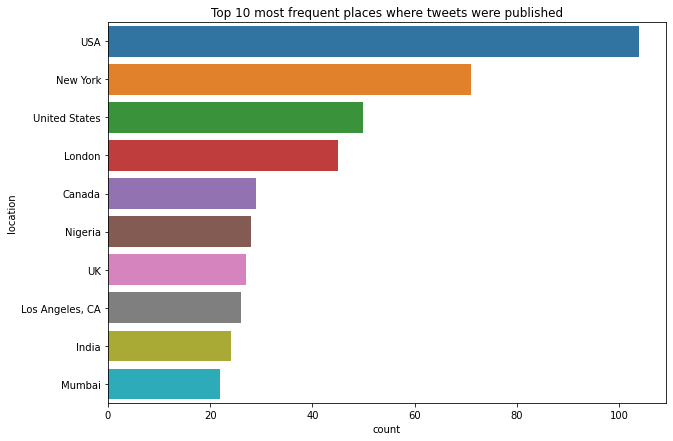

In [6]:
plt.figure(figsize= (10,7))
sns.countplot(y= train['location'], order=train['location'].value_counts().iloc[:10].index)
plt.title('Top 10 most frequent places where tweets were published')
plt.show()

In [7]:
train['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

## Drop the columns with no iteration 

In [8]:
train = train.drop(['keyword', 'location'], axis=1)
test = test.drop(['keyword', 'location'], axis=1)

## Stopwords

In [9]:
def stopwords(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = [i for i in text.split() if not i in stopwords]
    return (" ".join(palavras))

In [10]:
train['text'] = [stopwords(i) for i in train['text']]
train['text'][:10]

# applying to test
test['text'] = [stopwords(i) for i in test['text']]

## Removing caracters

In [11]:
def remove_carac(text):
    text = text.str.lower() 
    text = text.str.replace(r"\#","") 
    text = text.str.replace(r"http\S+","")  
    text = text.str.replace(r"@","")
    text = text.str.replace(r"[^a-zA-Z#]", " ")
    text = text.str.replace("\s{2,}", "")
    return text

In [12]:
train['clean_text'] = remove_carac(train['text'])

# applying to test
test['clean_text'] = remove_carac(test['text'])

train['clean_text'][:10]

0     our deeds reason earthquake may allah forgive us
1                 forest fire near la ronge saskcanada
2    all residents askedshelter placenotified offic...
3    people receive wildfires evacuation orders cal...
4    just got sent photo ruby alaska smoke wildfire...
5    rockyfire updatecalifornia hwyclosed direction...
6    flood disaster heavy rain causes flash floodin...
7                        i m top hill i see fire woods
8    there s emergency evacuation happening buildin...
9                       i m afraid tornado coming area
Name: clean_text, dtype: object

## Lemmatization

In [13]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

def lemmatization(texto):
    palavras = []
    for w in texto.split():
        palavras.append(lem.lemmatize(w))
    return (" ".join(palavras))

In [14]:
train['clean_text'] = [lemmatization(f) for f in train['clean_text']]
train['clean_text'][:10]

# Applying to test
test['clean_text'] = [lemmatization(f) for f in test['clean_text']]

## Stemming

In [15]:
from nltk.stem.snowball import SnowballStemmer

def stemming(texto):
    stemmer = SnowballStemmer(language='english')
    palavras = []
    for w in texto.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [16]:
train['clean_text'] = [stemming(t) for t in train['clean_text']]

# applying to test
test['clean_text'] = [stemming(t) for t in test['clean_text']]

train['clean_text'][:10]

0         our deed reason earthquak may allah forgiv u
1                  forest fire near la rong saskcanada
2    all resid askedshelt placenotifi officersno ev...
3          peopl receiv wildfir evacu order california
4    just got sent photo rubi alaska smoke wildfir ...
5    rockyfir updatecalifornia hwyclos direct due l...
6    flood disast heavi rain caus flash flood stree...
7                         i m top hill i see fire wood
8       there s emerg evacu happen build across street
9                         i m afraid tornado come area
Name: clean_text, dtype: object

In [17]:
# droping the 'text' column and organizing
train = train.drop(['text'], axis=1)
train = train.reindex(columns=['clean_text', 'target'])

test = test.drop(['text'], axis=1)

## Ploting the frequecy words

In [18]:
# concat the train and test dataset first
df = pd.concat([train,test], ignore_index=True)

# droping the words with less than 3 letters for plot
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,clean_text,target,id
0,deed reason earthquak allah forgiv,1.0,NaN
1,forest fire near rong saskcanada,1.0,NaN
2,resid askedshelt placenotifi officersno evacu ...,1.0,NaN
3,peopl receiv wildfir evacu order california,1.0,NaN
4,just sent photo rubi alaska smoke wildfir pour...,1.0,NaN


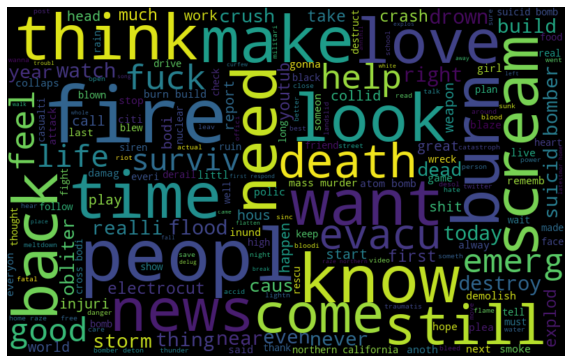

In [19]:
# Using the WordCloud to see the frequency of the words
from wordcloud import WordCloud

palavras = ' '.join([text for text in df['clean_text']])

wordcloud = WordCloud(width=800, height = 500, max_font_size=110).generate(palavras)

# plotting
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

fig1 = plt.gcf()
fig1.savefig('words.png')
plt.show()

## Tokenizer and Vectorization with roBERTa

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import transformers
import tqdm

In [21]:
# changing the device to GPU
device = torch.device('cuda:0')

In [22]:
# using the roBERTa model
roberta_weights = 'roberta-base'
roberta_model = transformers.RobertaModel.from_pretrained(roberta_weights).to(device)
roberta_token = transformers.RobertaTokenizer.from_pretrained(roberta_weights)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [23]:
# tokenizing the clean_text column on train dataset
tokenized = [torch.tensor(roberta_token.encode(i)).unsqueeze(0).to(device) for i in train['clean_text']]

In [24]:
embeddings = []

roberta_model.eval()  # the eval lock the model and stop training
with torch.no_grad(): # aplying non-training to torch
    for x in tqdm.notebook.tqdm(tokenized):  # tqdm is a progress bar
        embeddings.append(roberta_model(x)[1].cpu().numpy())  # changing the device to cpu for interation with sklearn

  0%|          | 0/7613 [00:00<?, ?it/s]

In [25]:
# transforming the embeddings list to a array of arrays
embeddings_numpy = np.array(embeddings).squeeze()

embeddings_numpy.shape

(7613, 768)

In [26]:
# defining the features and target
X = embeddings_numpy
y = train['target']

## Split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, random_state=42)

## Cross Validation

In [28]:
from sklearn.model_selection import RepeatedKFold

kf = RepeatedKFold(n_splits= 2, n_repeats=10, random_state=42)


for train_lines, valid_lines in kf.split(X):
    X_train, X_valid = X[train_lines], X[valid_lines]
    y_train, y_valid = y[train_lines], y[valid_lines]

## Building the LGBM model

In [29]:
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type= 'gbdt', objective='binary', learning_rate= 0.1, random_state=42, class_weight='balanced', num_leaves=32)
lgbm.fit(X_train, y_train)

print(classification_report(y_valid, lgbm.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2152
           1       0.76      0.68      0.72      1654

    accuracy                           0.77      3806
   macro avg       0.77      0.76      0.76      3806
weighted avg       0.77      0.77      0.77      3806



## Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

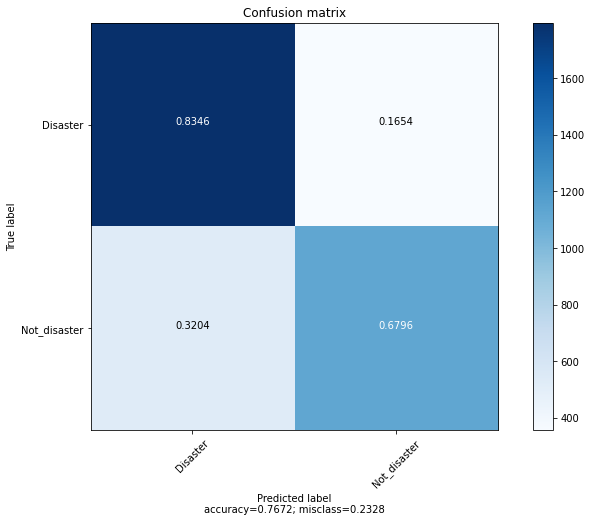

In [31]:
y_pred = lgbm.predict(X_valid)

plot_confusion_matrix(confusion_matrix(y_valid, y_pred), ['Disaster', 'Not_disaster'])

## Test

In [32]:
tokenized_test = [torch.tensor(roberta_token.encode(i)).unsqueeze(0).to(device) for i in test['clean_text']]

In [33]:
test_embeddings = []

roberta_model.eval()  # the eval lock the model and stop training
with torch.no_grad(): # aplying non-training to torch
    for x in tqdm.notebook.tqdm(tokenized_test):  # tqdm is a progress bar
        test_embeddings.append(roberta_model(x)[1].cpu().numpy())  # changing the device to cpu for interation with sklearn

  0%|          | 0/3263 [00:00<?, ?it/s]

In [34]:
test_embeddings_numpy = np.array(test_embeddings).squeeze()

test_embeddings_numpy.shape

(3263, 768)

In [35]:
# predicting the test
features = test_embeddings_numpy

pred = lgbm.predict(features)

# Transforming to Series for submission

In [36]:
sample_submission = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

In [37]:
sample_submission['target'].shape

(3263,)

In [38]:
sample_submission['target'] = pred
sample_submission['target'].value_counts()

0    2021
1    1242
Name: target, dtype: int64

In [39]:
sample_submission.to_csv('submission.csv', index=False)

In [40]:
!head -n10 submission.csv

id,target
0,0
2,1
3,1
9,1
11,1
12,0
21,0
22,0
27,0
